In [1]:
pip install langchain langgraph langsmith langchain_groq langchain_community

^C
Note: you may need to restart the kernel to use updated packages.


  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 4.6 MB/s eta 0:00:00
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.1 MB 5.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 4.4 MB/s eta 0:00:00
Using cached anyio-4.9.0-py3-none-any.whl (100 kB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------- ----------------------- 1.0/2.5 MB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 2.1/2.

In [ ]:
groq_api_key = "ENTER_API_KEY"

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(groq_api_key  = groq_api_key, model_name = "gemma2-9b-it")

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

In [7]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [8]:
graph_builder

In [9]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}

In [10]:
graph_builder.add_node('chatbot',chatbot)

In [11]:
graph_builder

In [12]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot', END)

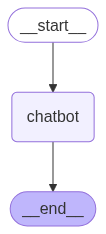

In [13]:
graph_builder.compile()

In [14]:
graph = graph_builder.compile()

In [17]:
while True:
    user_input = input("user:")
    if user_input.lower() in ['quit', 'q']:
        print('Good Bye, thank you for using Langgraph Framework')
        break
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:', value['messages'].content)

dict_values([{'messages': AIMessage(content='Predicting the AI jobs market in 2025 is a complex task, but based on current trends and projections, here\'s a glimpse:\n\n**Growth and Demand:**\n\n* **Explosive Growth:**  The AI market is expected to continue its rapid growth, with job demand outpacing supply significantly. \n* **Diverse Roles:**  AI will create a wide range of jobs beyond traditional "data scientist" roles.  Expect to see:\n    * **AI Specialists:**  Experts in specific AI domains like computer vision, natural language processing, or robotics.\n    * **AI Trainers and Engineers:**  Professionals who develop, train, and maintain AI models.\n    * **AI Ethicists and Policy Experts:**  Addressing the ethical and societal implications of AI.\n    * **AI Product Managers:**  Bridging the gap between technical development and business needs.\n* **High Salaries:**  AI skills will remain highly sought after, commanding premium salaries.\n\n**Skills in Demand:**\n\n* **Technical